In [2]:
%pip install openai
%pip install datasets
%pip install konlpy
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.3 MB/s eta 0:0

# Fine-tuning으로 고객사별 맞춤 Chatbot 학습 (1) - 데이터 준비

### 1. Koalpaca dataset 준비

In [19]:
from datasets import load_dataset

data = load_dataset("beomi/KoAlpaca-v1.1a")

In [20]:
print(data)

DatasetDict({
    train: Dataset({
        features: ['instruction', 'output', 'url'],
        num_rows: 21155
    })
})


In [21]:
data = data.map(
    lambda x: {'text': f"### 질문: {x['instruction']}\n\n### 답변: {x['output']}<|endoftext|>" }
)

In [22]:
print(data)

DatasetDict({
    train: Dataset({
        features: ['instruction', 'output', 'url', 'text'],
        num_rows: 21155
    })
})


In [23]:
for d in data['train']:
  print(d)
  break

{'instruction': '양파는 어떤 식물 부위인가요? 그리고 고구마는 뿌리인가요?', 'output': '양파는 잎이 아닌 식물의 줄기 부분입니다. 고구마는 식물의 뿌리 부분입니다. \n\n식물의 부위의 구분에 대해 궁금해하는 분이라면 분명 이 질문에 대한 답을 찾고 있을 것입니다. 양파는 잎이 아닌 줄기 부분입니다. 고구마는 다른 질문과 답변에서 언급된 것과 같이 뿌리 부분입니다. 따라서, 양파는 식물의 줄기 부분이 되고, 고구마는 식물의 뿌리 부분입니다.\n\n 덧붙이는 답변: 고구마 줄기도 볶아먹을 수 있나요? \n\n고구마 줄기도 식용으로 볶아먹을 수 있습니다. 하지만 줄기 뿐만 아니라, 잎, 씨, 뿌리까지 모든 부위가 식용으로 활용되기도 합니다. 다만, 한국에서는 일반적으로 뿌리 부분인 고구마를 주로 먹습니다.', 'url': 'https://kin.naver.com/qna/detail.naver?d1id=11&dirId=1116&docId=55320268', 'text': '### 질문: 양파는 어떤 식물 부위인가요? 그리고 고구마는 뿌리인가요?\n\n### 답변: 양파는 잎이 아닌 식물의 줄기 부분입니다. 고구마는 식물의 뿌리 부분입니다. \n\n식물의 부위의 구분에 대해 궁금해하는 분이라면 분명 이 질문에 대한 답을 찾고 있을 것입니다. 양파는 잎이 아닌 줄기 부분입니다. 고구마는 다른 질문과 답변에서 언급된 것과 같이 뿌리 부분입니다. 따라서, 양파는 식물의 줄기 부분이 되고, 고구마는 식물의 뿌리 부분입니다.\n\n 덧붙이는 답변: 고구마 줄기도 볶아먹을 수 있나요? \n\n고구마 줄기도 식용으로 볶아먹을 수 있습니다. 하지만 줄기 뿐만 아니라, 잎, 씨, 뿌리까지 모든 부위가 식용으로 활용되기도 합니다. 다만, 한국에서는 일반적으로 뿌리 부분인 고구마를 주로 먹습니다.<|endoftext|>'}


In [24]:
print(d['text'])

### 질문: 양파는 어떤 식물 부위인가요? 그리고 고구마는 뿌리인가요?

### 답변: 양파는 잎이 아닌 식물의 줄기 부분입니다. 고구마는 식물의 뿌리 부분입니다. 

식물의 부위의 구분에 대해 궁금해하는 분이라면 분명 이 질문에 대한 답을 찾고 있을 것입니다. 양파는 잎이 아닌 줄기 부분입니다. 고구마는 다른 질문과 답변에서 언급된 것과 같이 뿌리 부분입니다. 따라서, 양파는 식물의 줄기 부분이 되고, 고구마는 식물의 뿌리 부분입니다.

 덧붙이는 답변: 고구마 줄기도 볶아먹을 수 있나요? 

고구마 줄기도 식용으로 볶아먹을 수 있습니다. 하지만 줄기 뿐만 아니라, 잎, 씨, 뿌리까지 모든 부위가 식용으로 활용되기도 합니다. 다만, 한국에서는 일반적으로 뿌리 부분인 고구마를 주로 먹습니다.<|endoftext|>


### 2. Tokenizer 사용하기

In [25]:
from transformers import AutoTokenizer, BitsAndBytesConfig

model_id = "beomi/polyglot-ko-12.8b-safetensors"
tokenizer = AutoTokenizer.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [26]:
print(tokenizer.vocab_size)

30000


In [28]:
s = "안녕하세요!"
token_s = tokenizer(s)
print(token_s)

{'input_ids': [13417, 284, 1934, 4], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}


In [32]:
tokenizer.decode(1934)

'세요'

In [33]:
data = data.map(lambda samples: tokenizer(samples["text"]), batched=True)
for d in data['train']:
  print(d['input_ids'])
  break

Map:   0%|          | 0/21155 [00:00<?, ? examples/s]

[6, 6, 6, 2438, 29, 11535, 272, 1382, 6587, 6548, 11260, 34, 1273, 543, 425, 9751, 4408, 11260, 34, 202, 202, 6, 6, 6, 4253, 29, 11535, 272, 9964, 270, 1577, 6587, 285, 8260, 1649, 1441, 17, 543, 425, 9751, 6587, 285, 4408, 1649, 1441, 17, 224, 202, 202, 9600, 285, 6548, 285, 4878, 274, 879, 3716, 20739, 272, 669, 270, 2016, 2670, 307, 2438, 274, 741, 1865, 276, 1044, 283, 327, 276, 388, 1441, 17, 11535, 272, 9964, 270, 1577, 8260, 1649, 1441, 17, 543, 425, 9751, 1108, 2438, 359, 4253, 363, 2958, 551, 388, 359, 2192, 4408, 1649, 1441, 17, 3322, 15, 11535, 272, 6587, 285, 8260, 1649, 270, 740, 283, 15, 543, 425, 9751, 6587, 285, 4408, 1649, 1441, 17, 202, 202, 26205, 272, 4253, 29, 15583, 8260, 309, 11228, 19320, 276, 365, 327, 4389, 34, 224, 202, 202, 283, 11946, 8260, 309, 19126, 339, 11228, 19320, 276, 365, 327, 827, 17, 1146, 8260, 1708, 380, 769, 346, 15, 9964, 15, 1235, 15, 4408, 617, 1392, 6548, 293, 19126, 339, 1495, 605, 15596, 2802, 17, 2466, 15, 803, 363, 272, 1754, 10562, 44

In [ ]:
print(data)

DatasetDict({
    train: Dataset({
        features: ['instruction', 'output', 'url', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21155
    })
})


In [34]:
for d in data['train']:
  print(d['text'])
  print(d['input_ids'])
  break

### 질문: 양파는 어떤 식물 부위인가요? 그리고 고구마는 뿌리인가요?

### 답변: 양파는 잎이 아닌 식물의 줄기 부분입니다. 고구마는 식물의 뿌리 부분입니다. 

식물의 부위의 구분에 대해 궁금해하는 분이라면 분명 이 질문에 대한 답을 찾고 있을 것입니다. 양파는 잎이 아닌 줄기 부분입니다. 고구마는 다른 질문과 답변에서 언급된 것과 같이 뿌리 부분입니다. 따라서, 양파는 식물의 줄기 부분이 되고, 고구마는 식물의 뿌리 부분입니다.

 덧붙이는 답변: 고구마 줄기도 볶아먹을 수 있나요? 

고구마 줄기도 식용으로 볶아먹을 수 있습니다. 하지만 줄기 뿐만 아니라, 잎, 씨, 뿌리까지 모든 부위가 식용으로 활용되기도 합니다. 다만, 한국에서는 일반적으로 뿌리 부분인 고구마를 주로 먹습니다.<|endoftext|>
[6, 6, 6, 2438, 29, 11535, 272, 1382, 6587, 6548, 11260, 34, 1273, 543, 425, 9751, 4408, 11260, 34, 202, 202, 6, 6, 6, 4253, 29, 11535, 272, 9964, 270, 1577, 6587, 285, 8260, 1649, 1441, 17, 543, 425, 9751, 6587, 285, 4408, 1649, 1441, 17, 224, 202, 202, 9600, 285, 6548, 285, 4878, 274, 879, 3716, 20739, 272, 669, 270, 2016, 2670, 307, 2438, 274, 741, 1865, 276, 1044, 283, 327, 276, 388, 1441, 17, 11535, 272, 9964, 270, 1577, 8260, 1649, 1441, 17, 543, 425, 9751, 1108, 2438, 359, 4253, 363, 2958, 551, 388, 359, 2192, 4408, 1649, 1441, 17, 3322, 15, 11535, 272, 6587, 285, 8260, 1649, 270,

In [36]:
tokenizer.decode(2438)

' 질문'

### 3. Dataset 분석

In [37]:
instruction_list = [instance['instruction'] for instance in data['train']]
instruction_len_list = [len(a) for a in instruction_list]

(array([3.830e+02, 1.599e+03, 2.220e+03, 1.977e+03, 1.838e+03, 1.728e+03,
        1.544e+03, 1.200e+03, 1.091e+03, 9.180e+02, 8.290e+02, 7.120e+02,
        6.500e+02, 5.380e+02, 5.290e+02, 4.540e+02, 4.320e+02, 3.390e+02,
        3.350e+02, 2.710e+02, 2.380e+02, 2.040e+02, 1.700e+02, 1.340e+02,
        1.200e+02, 1.140e+02, 9.400e+01, 7.300e+01, 6.500e+01, 4.600e+01,
        3.700e+01, 3.300e+01, 2.600e+01, 3.600e+01, 3.300e+01, 2.000e+01,
        1.800e+01, 1.600e+01, 1.000e+01, 1.100e+01, 1.000e+01, 6.000e+00,
        7.000e+00, 6.000e+00, 2.000e+00, 7.000e+00, 7.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

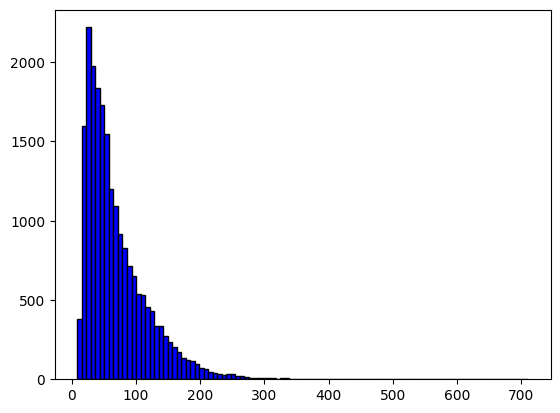

In [38]:
import matplotlib.pyplot as plt
plt.hist(instruction_len_list, bins = 100, color = 'blue', edgecolor = 'black')

In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm

raw_pos_tagged = []

tokenizer = Okt()

for inst in tqdm(instruction_list):
  cur_raw_pos_tagged = tokenizer.pos(inst, norm=True, stem=True)
  raw_pos_tagged += cur_raw_pos_tagged
print(raw_pos_tagged[0])

100%|██████████| 21155/21155 [04:11<00:00, 84.00it/s]

('양파', 'Noun')


In [ ]:
del_list = ['은', '는', '이', '가', '을', '를', '있다', '하다', '에', '게']

word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]:
        if (len(word[0]) != 1) & (word[0] not in del_list):
            word_cleaned.append(word[0])

## sample results
print(word_cleaned[0:100])

['양파', '어떻다', '식물', '부위', '그리고', '고구마', '뿌리', '스웨터', '유래', '어디', '시작', '되어다', '토성', '고리', '보이다', '이유', '무엇', '토성', '고리', '얼음', '같다', '여러', '물질', '이루어지다', '카시니', '찍다', '사진', '마치', '처럼', '보이다', '이유', '무엇', '물질', '공전', '속도', '빠르기', '때문', '카메라', '담다', '보이다', '건가', '또한', '야간', '빠르다', '움직이다', '자동차', '노출', '찍다', '생기다', '같다', '원리', '이다', '그리고', '생기다', '우주', '두운', '환경', '특성', '때문', '생각', '되다', '맞다', '화장품', 'OEM', '화장품', 'ODM', '차이점', '무엇', '화장품', '자체', '제조', '브랜드', '런칭', '위해', 'OEM', 'ODM', '용어', '대해', '혼란', '스럽다', '느끼다', '용어', '차이점', '무엇', '싶다', '사이보그', '늘다', '언제', '처음', '등장', '의미', '종류', '어떻다', '싶다', '씨앗', '냉장', '처리', '심다', '이유', '장기']


In [ ]:
from collections import Counter
result = Counter(word_cleaned)
word_dic = dict(result)
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
print(sorted_word_dic)

[('무엇', 9677), ('어떻다', 7960), ('되다', 5502), ('이유', 4927), ('궁금하다', 4037), ('이다', 3751), ('사용', 2488), ('않다', 2249), ('방법', 1812), ('그리고', 1743), ('같다', 1737), ('대해', 1723), ('싶다', 1720), ('건가', 1677), ('알다', 1512), ('다른', 1458), ('걸다', 1430), ('없다', 1412), ('먹다', 1375), ('보다', 1303), ('되어다', 1283), ('의미', 1236), ('설명', 1094), ('나오다', 1066), ('사람', 1050), ('자세하다', 1046), ('만들다', 1014), ('이름', 1011), ('경우', 1008), ('차이점', 1004), ('들다', 981), ('또한', 963), ('그렇다', 929), ('하나요', 912), ('아니다', 904), ('좋다', 874), ('해주다', 843), ('차이', 839), ('생기다', 762), ('오다', 742), ('가다', 717), ('원리', 697), ('자다', 686), ('많이', 683), ('어디', 677), ('받다', 645), ('유래', 635), ('무슨', 620), ('가장', 604), ('대한', 591), ('종류', 588), ('가능하다', 584), ('때문', 581), ('정확하다', 581), ('많다', 564), ('어느', 541), ('맞다', 537), ('관련', 525), ('보이다', 515), ('가지', 510), ('발생', 506), ('영화', 485), ('우리나라', 481), ('늘다', 472), ('차이다', 462), ('언제', 458), ('한국', 457), ('나라', 456), ('부르다', 446), ('표현', 444), ('함께', 421), ('현상', 419), ('사진', 41

In [ ]:
top20_words = sorted_word_dic[:20]
print(top20_words)

[('무엇', 9677), ('어떻다', 7960), ('되다', 5502), ('이유', 4927), ('궁금하다', 4037), ('이다', 3751), ('사용', 2488), ('않다', 2249), ('방법', 1812), ('그리고', 1743), ('같다', 1737), ('대해', 1723), ('싶다', 1720), ('건가', 1677), ('알다', 1512), ('다른', 1458), ('걸다', 1430), ('없다', 1412), ('먹다', 1375), ('보다', 1303)]


##### reference
- https://github.com/locuslab/massive-activations